In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrc0188


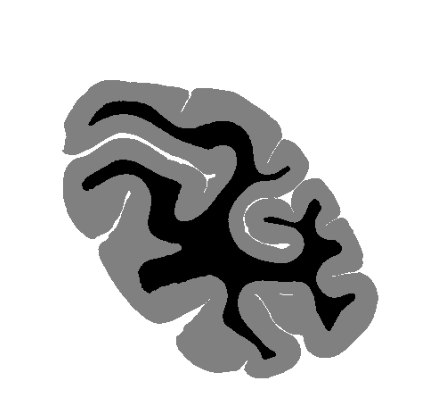

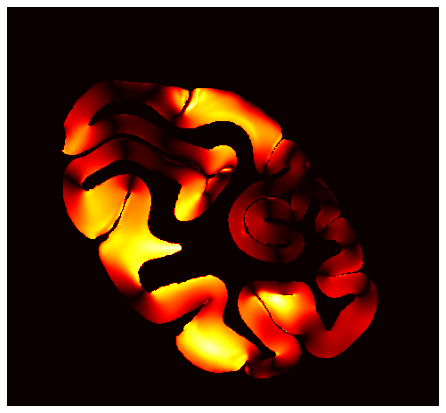

In [2]:
# Load quantity of interest and the cortex segmentation volume

target_file = "data/aa/volume/brain_visa/cutting_angle_6.nii.gz"
cortex_file = "data/aa/volume/cortex/cortex_6.h5"

###

from vervet1818_3d.correlation.functions import load_data
import pli.image as im

target_volume, target_spacing, cortex_volume, cortex_spacing = load_data(
    target_file,
    cortex_file
)

im.show(cortex_volume[:, 50, :])
im.show(target_volume[:, 50, :], cmap='hot')

100%|██████████| 117/117 [00:52<00:00,  2.21it/s]


Scale
Fit
Train & Train:
R² train: 0.501


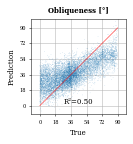

Train & Test:
R² test: 0.0409


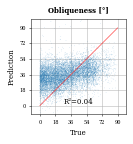

Test & Test:
Scale
Fit
R² tes testt: 0.361


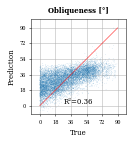

100%|██████████| 234/234 [00:03<00:00, 68.60it/s]


Scale
Fit
Train & Train:
R² train: 0.137


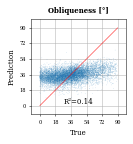

Train & Test:
R² test: 0.0742


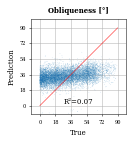

Test & Test:
Scale
Fit
R² tes testt: 0.12


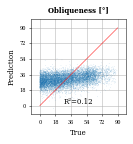

100%|██████████| 137/137 [00:25<00:00,  5.27it/s]


Scale
Fit
Train & Train:
R² train: 0.215


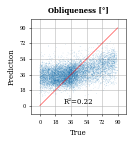

Train & Test:
R² test: -0.0744


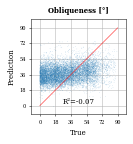

Test & Test:
Scale
Fit
R² tes testt: 0.118


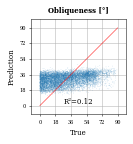

100%|██████████| 117/117 [00:11<00:00,  9.87it/s]


Scale
Fit
Train & Train:
R² train: 0.274


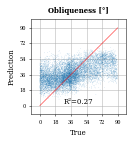

Train & Test:
R² test: 0.149


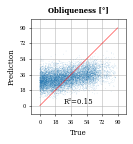

Test & Test:
Scale
Fit
R² tes testt: 0.219


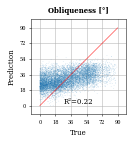

100%|██████████| 117/117 [00:11<00:00, 10.42it/s]


Scale
Fit
Train & Train:
R² train: 0.596


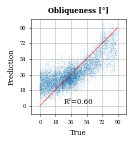

Train & Test:
R² test: 0.366


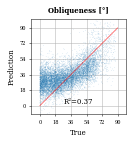

Test & Test:
Scale
Fit
R² tes testt: 0.512


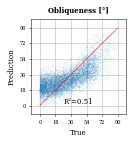

100%|██████████| 117/117 [00:11<00:00, 10.49it/s]


Scale
Fit
Train & Train:
R² train: 0.59


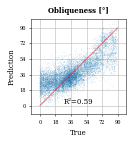

Train & Test:
R² test: 0.365


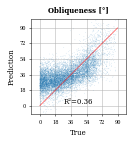

Test & Test:
Scale
Fit
R² tes testt: 0.514


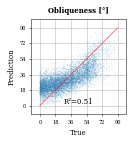

100%|██████████| 117/117 [00:09<00:00, 11.88it/s]


Scale
Fit
Train & Train:
R² train: 0.658


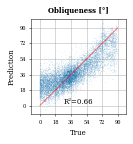

Train & Test:
R² test: 0.499


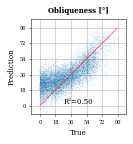

Test & Test:
Scale
Fit
R² tes testt: 0.579


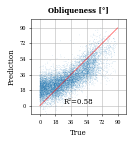

100%|██████████| 117/117 [00:10<00:00, 11.35it/s]


Scale
Fit
Train & Train:
R² train: 0.642


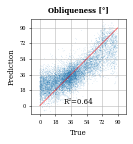

Train & Test:
R² test: 0.526


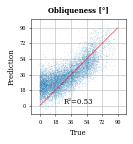

Test & Test:
Scale
Fit
R² tes testt: 0.609


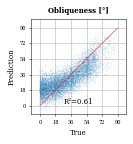

100%|██████████| 117/117 [00:25<00:00,  4.57it/s]


Scale
Fit
Train & Train:
R² train: 0.638


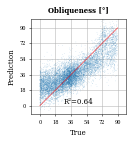

Train & Test:
R² test: 0.501


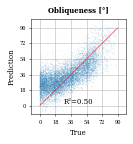

Test & Test:
Scale
Fit
R² tes testt: 0.572


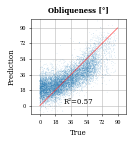

In [3]:
# Load feature maps and setup dictionary of section IDs as keys, starting at zero_section

title = "Obliqueness [°]"
name = "obliqueness"

# Define features
features_path = "data/aa/features/"

models = [
    "simclr-imagenet",
    "pli_glcm",
    "pli_sobel_histo",
    "resnet50_planes8_962-1083_same",
    "resnet50_planes8_962-1083_circle_small",
    "resnet50_planes8_962-1083_circle",
    "resnet50_planes8_962-1083_neighbor",
    "resnet50_planes8_962-1083_sphere_small",
    "resnet50_planes8_962-1083_sphere",
]

feature_groups = [
    "Features/2048",
    "Features/36",
    "Features/252",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
]

# Define Train/Test split
zero_section = 841
min_ix = 30
split_ix = 120
max_ix=  210

# Define training data
GM_CLASS = 2

train_count = 10_000
test_count = 10_000

seed = 299_792_458

# Visualization
target_range = (0, 90)
vis_range = (-10, 100)

subsample = 10_000

###

from vervet1818_3d.correlation.functions import load_features, aggregate_data, ridge_evaluation
import os
import matplotlib.pyplot as plt

# Set the global font size
plt.rcParams.update({'font.family': 'serif'})

results = {}

for model, feature_group in zip(models, feature_groups):

    feature_dir = os.path.join(features_path, model)

    feature_maps = load_features(
        feature_dir,
        feature_group,
        zero_section,
        cortex_volume
    )

    test_indices = sorted([f for f in feature_maps.keys() if min_ix <= f < split_ix])
    train_indices = sorted([f for f in feature_maps.keys() if max_ix > f >= split_ix])

    train_features, train_target = aggregate_data(train_indices, train_count, seed, cortex_volume, feature_maps, target_volume, GM_CLASS)
    test_features, test_target = aggregate_data(test_indices, test_count, seed, cortex_volume, feature_maps, target_volume, GM_CLASS)

    r = ridge_evaluation(
        train_features,
        train_target,
        test_features,
        test_target,
        target_range,
        vis_range,
        name,
        model,
        title,
        subsample,
    )

    results[model] = r

In [4]:
print("| Method | Train/Train R2\t| Train/Test R2\t| Test/Test R2\t|")
print("| --- | --- | --- | --- |")

for k in results.keys():
    print(f"| {k}\t | {results[k]['train_train_r2']:.3g}\t| {results[k]['train_test_r2']:.3g} | {results[k]['test_test_r2']:.3g} |")

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.501	| 0.0409 | 0.361 |
| pli_glcm	 | 0.137	| 0.0742 | 0.12 |
| pli_sobel_histo	 | 0.215	| -0.0744 | 0.118 |
| resnet50_planes8_962-1083_same	 | 0.274	| 0.149 | 0.219 |
| resnet50_planes8_962-1083_circle_small	 | 0.596	| 0.366 | 0.512 |
| resnet50_planes8_962-1083_circle	 | 0.59	| 0.365 | 0.514 |
| resnet50_planes8_962-1083_neighbor	 | 0.658	| 0.499 | 0.579 |
| resnet50_planes8_962-1083_sphere_small	 | 0.642	| 0.526 | 0.609 |
| resnet50_planes8_962-1083_sphere	 | 0.638	| 0.501 | 0.572 |


Ridge (with clip):

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.501	| 0.0409 | 0.361 |
| pli_glcm	 | 0.137	| 0.0742 | 0.12 |
| pli_sobel_histo	 | 0.215	| -0.0744 | 0.118 |
| resnet50_planes8_962-1083_same	 | 0.274	| 0.149 | 0.219 |
| resnet50_planes8_962-1083_circle_small	 | 0.596	| 0.366 | 0.512 |
| resnet50_planes8_962-1083_circle	 | 0.59	| 0.365 | 0.514 |
| resnet50_planes8_962-1083_neighbor	 | 0.658	| 0.499 | 0.579 |
| resnet50_planes8_962-1083_sphere_small	 | 0.642	| 0.526 | 0.609 |
| resnet50_planes8_962-1083_sphere	 | 0.638	| 0.501 | 0.572 |


Linear:

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.62	| -10.5 | 0.471 |
| pli_glcm	 | 0.17	| -0.0239 | 0.156 |
| pli_sobel_histo	 | 0.24	| -1.36e+07 | 0.135 |
| resnet50_planes8_962-1083_same	 | 0.359	| 0.137 | 0.272 |
| resnet50_planes8_962-1083_circle_small	 | 0.678	| 0.32 | 0.572 |
| resnet50_planes8_962-1083_circle	 | 0.668	| 0.327 | 0.569 |
| resnet50_planes8_962-1083_neighbor	 | 0.715	| 0.465 | 0.616 |
| resnet50_planes8_962-1083_sphere_small	 | 0.702	| 0.501 | 0.644 |
| resnet50_planes8_962-1083_sphere	 | 0.692	| 0.449 | 0.604 |